In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")['label']
y_test = pd.read_csv("kdd99_testing_labels.csv")['label']

print(f"Shape of training dataset: {X_train.shape}")
print(f"Shape of testing dataset: {X_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Shape of training dataset: (370515, 32)
Shape of testing dataset: (123505, 32)
Shape of training labels: (370515,)
Shape of testing labels: (123505,)


In [3]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1_200_000)
model.fit(X_train, y_train)
     

LogisticRegression(max_iter=1200000)

In [5]:
y_predicted = model.predict(X_test)

print(f"Prediction score on the training data: {model.score(X_train, y_train)}")
print(f"Prediction score on the testing data: {model.score(X_test, y_test)}")

Prediction score on the training data: 0.9928936750199048
Prediction score on the testing data: 0.9928909760738431


In [6]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_predicted)
report = classification_report(y_test, y_predicted)

print(report)

              precision    recall  f1-score   support

         dos       1.00      0.99      1.00     97676
      normal       0.97      1.00      0.98     24482
       probe       0.96      0.91      0.93      1056
         r2l       0.81      0.56      0.66       279
         u2r       1.00      0.33      0.50        12

    accuracy                           0.99    123505
   macro avg       0.95      0.76      0.82    123505
weighted avg       0.99      0.99      0.99    123505



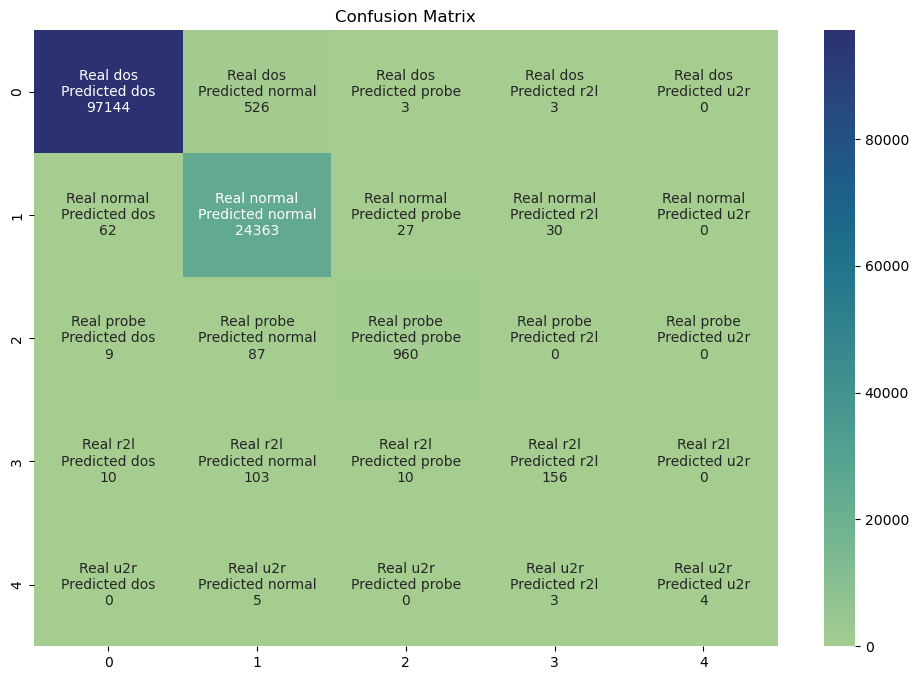

In [7]:
# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)


# confusion matrix visualization

plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     